In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Load the above-linked csv file as a pandas dataframe. Check & plot if any of the columns has missing values. If they have, investigate if the missingness is random or not.

Impute the missing values in a sensible way:

-   if only a very small percentage is missing, imputing with the
    column-wise mean makes sense, or also removing the missing rows
    makes sense
-   if in a row almost all the entries is missing, it worth to remove
    that given row
-   if a larger portion is missing from a column, usually it worth to
    encode that with a value that does not appear in the dataset (eg:
    -1).

The imputing method affects different machine learning models different
way, but now we are interested only in EDA, so try to keep as much
information as possible!

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

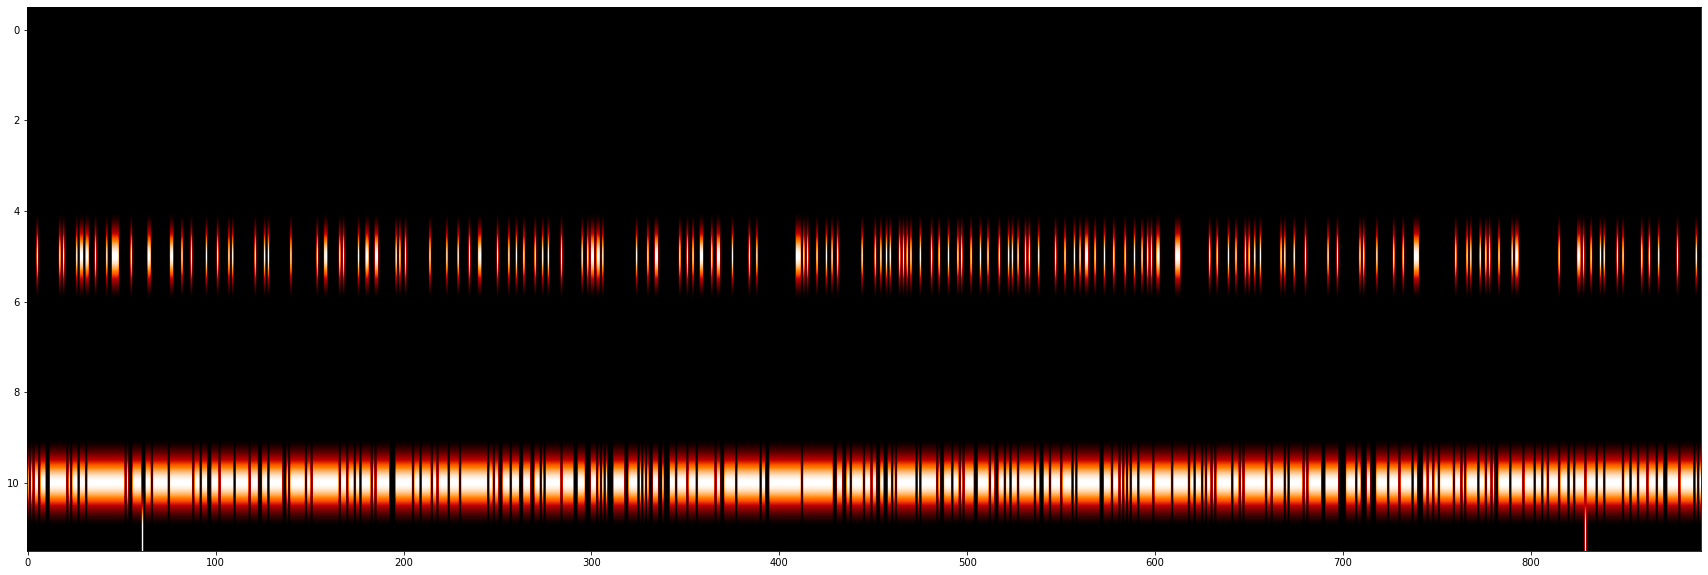

In [47]:
figure(figsize=(30, 10))
imshow(titanic.isna().T,cmap='gist_heat', aspect='auto')

#### Let's dive a bit deeper

In [8]:
#to have the average data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
cabins = titanic[titanic.Cabin.notna()].Cabin
cabins

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

In [10]:
titanic[titanic.Cabin.notna()].Survived.describe()

count    204.000000
mean       0.666667
std        0.472564
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

The known cabins by deck name, please see uploaded TITANIC.jpg picture. By carefully analysing the picture, we can deduce that most of the known data is from B,C,D,E which is roughly in the middle height of the ship.

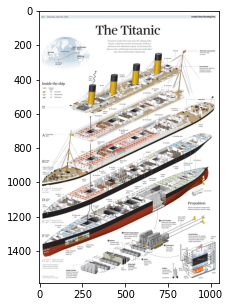

In [50]:
image = plt.imread('TITANIC.jpg')
figure(figsize=(10, 5))
imshow(image)

In [51]:
decks = ['A','B', 'C','D','E','F','G']
for ideck in decks:
    print('# of known cabins on deck %s:' %ideck + str(unique(cabins.str.startswith(ideck),return_counts=True)[1][1]))

# of known cabins on deck A:15
# of known cabins on deck B:47
# of known cabins on deck C:59
# of known cabins on deck D:33
# of known cabins on deck E:32
# of known cabins on deck F:13
# of known cabins on deck G:4


In [52]:
decks = ['A','B', 'C','D','E','F','G']
for ideck in decks:
    print('# of survivors with cabins on deck %s based on known cabin placement:' %ideck + str(unique(titanic[titanic.Survived == 1].Cabin.dropna().str.startswith(ideck),return_counts=True)[1][1]))

# of survivors with cabins on deck A based on known cabin placement:7
# of survivors with cabins on deck B based on known cabin placement:35
# of survivors with cabins on deck C based on known cabin placement:35
# of survivors with cabins on deck D based on known cabin placement:25
# of survivors with cabins on deck E based on known cabin placement:24
# of survivors with cabins on deck F based on known cabin placement:8
# of survivors with cabins on deck G based on known cabin placement:2


Those that don't have missing data for the cabins, are mostly from 1st class passengers.

In [53]:
print('Total number of passengers per class: ' + str(unique(titanic.Pclass,return_counts=True)))

Total number of passengers per class: (array([1, 2, 3]), array([216, 184, 491]))


In [54]:
print(unique(titanic[titanic.Cabin.notna()].Pclass,return_counts=True))
print(unique(titanic[titanic.Age.notna()].Pclass,return_counts=True))

(array([1, 2, 3]), array([176,  16,  12]))
(array([1, 2, 3]), array([186, 173, 355]))


By comparing the classes with not missing data in age, we can determine that in all classes, we know the ages of more than 70% of people per class.

In [55]:
age, agecount = unique(titanic[titanic.Age.notna()].Age,return_counts=True)

Text(0.5, 1.0, 'Age v number of persons with known age')

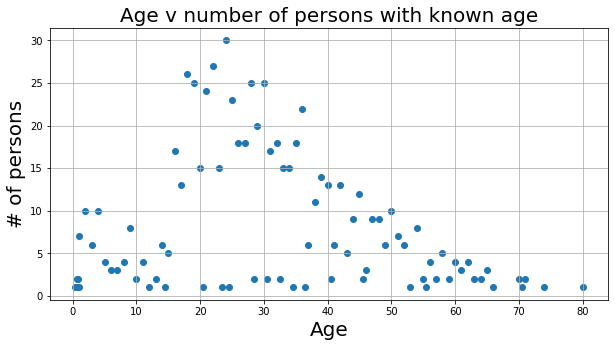

In [56]:
figure(figsize=(10, 5))
grid(True)
scatter(age,agecount)
xlabel('Age', fontsize=20)
ylabel('# of persons', fontsize=20)
title('Age v number of persons with known age', fontsize=20)

We can clearly see that the cabin missing data is not random at all. Lower class people are more likely to have missing class based on the cabin they occupied.

In [57]:
print('Classes with missing cabin number: ' + str(unique(titanic[titanic.Cabin.isna()].Pclass,return_counts=True)))

Classes with missing cabin number: (array([1, 2, 3]), array([ 40, 168, 479]))


##### The answer if the missing data is random or not: Not random, based on cabin missing data, most people were from the 3rd class, a.k.a. poor people. Age did not really determine a role as roughly the same percentage of people have missing values, so seemingly random. If we check the known ages, we can see that the most known ages are not evenly distributed.

### 2. Create a heatmap which shows how many people survived and dies with the different Pclass variables. You need to create a table where the columns indicates if a person survived or not, the rows indicates the different Pclass and the cell values contains the number of people belonging the that given category. The table should be colored based on the value of the cells in the table.

<AxesSubplot:title={'center':'Alive or Dead versus Classes'}>

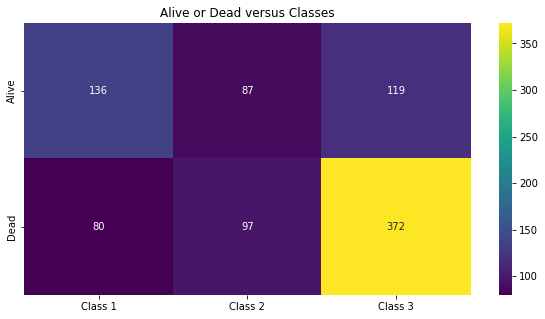

In [85]:
figure(figsize=(10, 5))
surv_class, numsurv = unique(titanic[titanic.Survived == 1].Pclass,return_counts=True)
_ , numdead = unique(titanic[titanic.Survived == 0].Pclass,return_counts=True)
index = ['Alive','Dead']
cols = ['Class 1', 'Class 2', 'Class 3']

df = pd.DataFrame([numsurv,numdead], index=index, columns=cols)
plt.title('Alive or Dead versus Classes')
sns.heatmap(df, 
            cmap='viridis', 
            annot=True,
            xticklabels=True,
           fmt='d')

In [59]:
#!pip install plotly

In [63]:
import plotly.express as px
fig = px.imshow(df,
                color_continuous_scale=px.colors.sequential.Viridis,
                title='Alive or Dead versus Classes')
fig.show()

### 3. Create boxplots for each different Pclass. The boxplot should show the age distribution for the given Pclass. Plot all of these next to each other in a row to make it easier to compare!

Text(0.5, 1.0, 'Age with regards to classes')

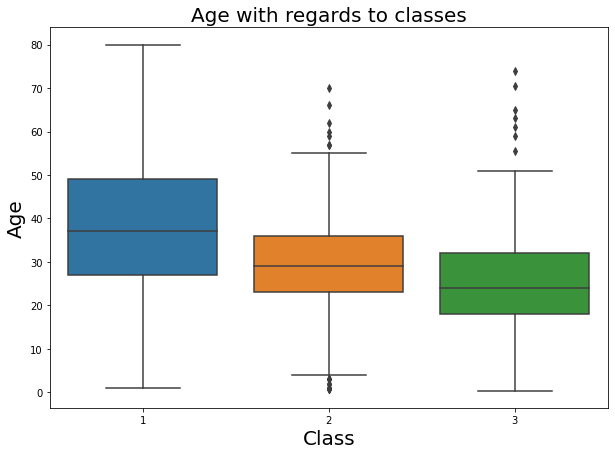

In [21]:
figure(figsize=(10,7))
sns.boxplot(y='Age',x='Pclass',data=titanic)
xlabel('Class', fontsize=20)
ylabel('Age', fontsize=20)
title('Age with regards to classes', fontsize=20)

### 4. Calculate the correlation matrix for the numerical columns. Show it also as a heatmap described at the 1st task.

Which feature seems to play the most important role in surviving/not
surviving? Explain how and why could that feature be important!

In [22]:
titanic.info() #-> to select which columns are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Let's check with all missing data

In [ ]:
fig = px.imshow(titanic.corr(),
                color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

<AxesSubplot:>

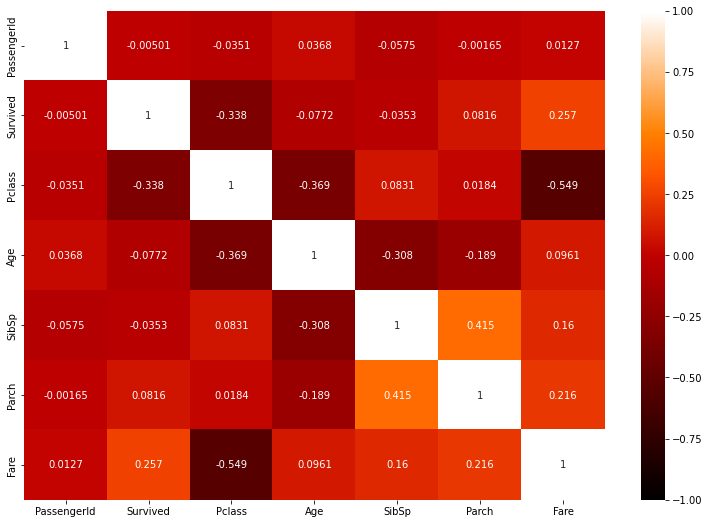

In [97]:
figure(figsize=(13,9))
sns.heatmap(titanic.corr(), 
            cmap='gist_heat', 
            annot=True,
            xticklabels=True,
            vmin=-1.,
           fmt='.3g')

We can determine the following:
* Anticorrelates Pclass with Survived: as we decrease the class number i.e. 3->1, the survived increases 0->1 thus first class is more likely to survive
* Fare anticorrelates with Pclass and correlates with Survived: same explanation for anticorrelations, and increased fare means better class thus better chance at survival
* Age surprisingly is neutral or very small anticorrelation

Similar outcome is expected when dropping the missing age rows

In [24]:
dropped_titanic = titanic.copy()

In [25]:
dropped_titanic.dropna(subset = ["Age"], inplace=True)

In [26]:
dropped_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [76]:
fig = px.imshow(dropped_titanic.corr(),color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

<AxesSubplot:>

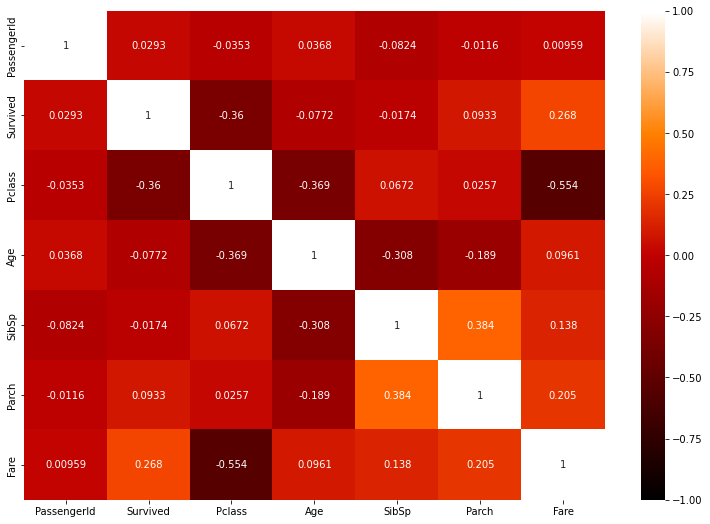

In [103]:
figure(figsize=(13,9))
sns.heatmap(dropped_titanic.corr(), 
            cmap='gist_heat', 
            annot=True,
            xticklabels=True,
            vmin=-1.,
           fmt='.3g')

Slightly changed, but by not much.

### 5. Create two plots which you think are meaningful. Interpret both of them. (Eg.: older people buy more expensive ticket? people buying more expensive ticket survive more? etc.)

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Sex with regards to classes

In [29]:
_,totalpass = unique(titanic.Sex,return_counts=True)

In [30]:
classes, num_per_sex_fem = unique(titanic[titanic.Sex == 'female'].Pclass,return_counts=True)
_ , num_per_sex_m = unique(titanic[titanic.Sex == 'male'].Pclass,return_counts=True)
index = ['Female','Male']
df = pd.DataFrame([num_per_sex_fem/totalpass[0],num_per_sex_m/totalpass[1]], index=index, columns=cols)

In [31]:
fig = px.imshow(df,color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

Text(0.5, 1.0, 'Sex with regards to classes')

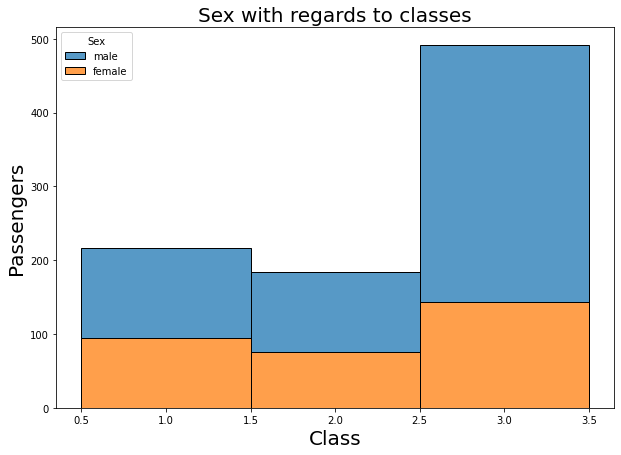

In [32]:
#!pip install -U seaborn
figure(figsize=(10,7))
sns.histplot(x='Pclass',data=titanic, hue='Sex',multiple="stack", discrete=True)
xlabel('Class', fontsize=20)
ylabel('Passengers', fontsize=20)
title('Sex with regards to classes', fontsize=20)


It is visible that in all cases, more men were on board, and in particular on class 3. Since the amount of passengers per sex is not equal, there were more single men on board than single women, especially in class 3. Of course there were children who could've travelled alone or one family would've more boy than girl.

##### Fare with regards to embarkment

In [33]:
Fare_dropped_titanic = titanic.copy()
Fare_dropped_titanic.dropna(subset = ["Fare"], inplace=True)

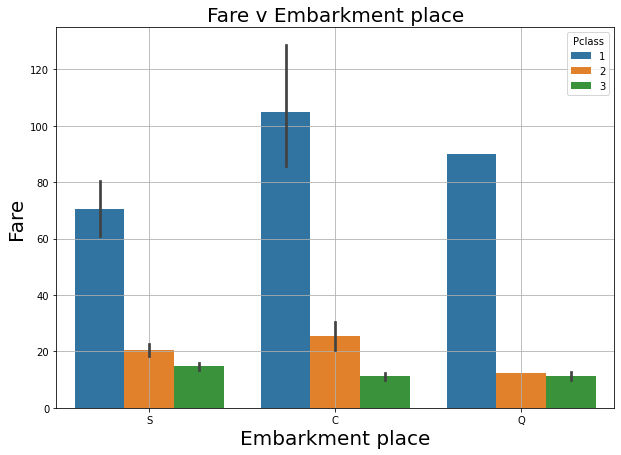

In [34]:
#!pip install -U seaborn
figure(figsize=(10,7))
sns.barplot(x='Embarked',y='Fare',data=titanic, hue='Pclass')
xlabel('Embarkment place', fontsize=20)
ylabel('Fare', fontsize=20)
title('Fare v Embarkment place', fontsize=20)
grid(True)

Visible that there were indeed huge differences among the prices. The cheapest for the rich was Southampton, while for the poorest, the chance to be on the second class was at Queenstown. 

## Tried but ultimately failed
We have missing values in Embarked part. Let's try to figure out what was it based on Fare

In [35]:
fareTable = titanic.groupby(['Embarked', 'Pclass'])['Fare'].mean().reset_index().pivot(index='Pclass', columns='Embarked', values='Fare')
fareTable

Embarked,C,Q,S
Pclass,,,
1,104.718529,90.000000,70.364862
2,25.358335,12.350000,20.327439
3,11.214083,11.183393,14.644083


In [36]:
print(titanic[titanic.Embarked.isna()].Fare)
print(titanic[titanic.Embarked.isna()].Pclass)


61     80.0
829    80.0
Name: Fare, dtype: float64
61     1
829    1
Name: Pclass, dtype: int64


In [37]:
fareTable.loc[(1)] == 90

Embarked
C    False
Q     True
S    False
Name: 1, dtype: bool

In [38]:
tableT = titanic.groupby(['Embarked', 'Pclass'])['Fare'].mean().reset_index()

In [39]:
for iPassenger in range(len(titanic[titanic.Embarked.isna()].Pclass)):
    for iFare in range(titanic[titanic.Embarked.isna()].Fare):
        tableT[tableT.Pclass == titanic[titanic.Embarked.isna()].Pclass.reset_index(drop=True)[iPassenger]

SyntaxError: unexpected EOF while parsing (<ipython-input-39-d07a37ea96cb>, line 3)

In [40]:
tableTabs(tableT[tableT.Pclass == titanic[titanic.Embarked.isna()].Pclass.reset_index(drop=True)[iPassenger]].Fare - titanic[titanic.Embarked.isna()].Fare.reset_index(drop=True)[0])

NameError: name 'tableTabs' is not defined